In [101]:
import cv2
import numpy as np

In [102]:
image=cv2.imread("test_image.jpg");

In [103]:
#finding edges using canny method
lanes=np.copy(image)
gray=cv2.cvtColor(lanes,cv2.COLOR_RGB2GRAY)
blur=cv2.GaussianBlur(gray,(5,5),0);
canny=cv2.Canny(blur,50,150)

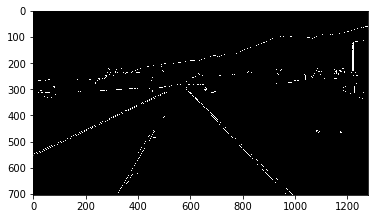

In [104]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
plt.show()

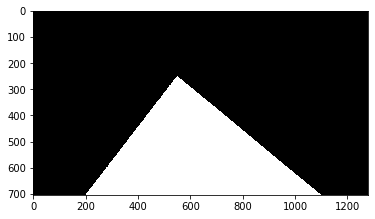

In [105]:
# filling our mask on the color of interest
height=canny.shape[0]
polygons=np.array([[(200,height),(1100,height),(550,250)]])
mask=np.zeros_like(canny)
cv2.fillPoly(mask,polygons,255)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

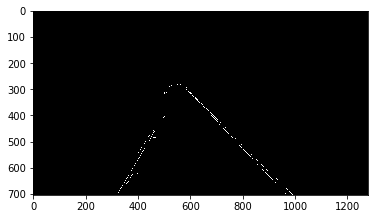

In [106]:
# masking the canny picture
masked_image=cv2.bitwise_and(canny,mask)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.show()

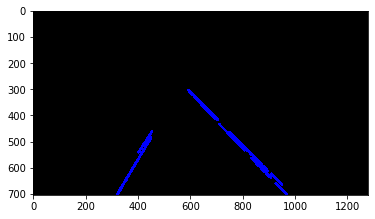

In [107]:
# making lines using HoughSpace
lines=cv2.HoughLinesP(masked_image,2,np.pi/180,10,minLineLength=40,maxLineGap=5)
line_image=np.zeros_like(image)
if lines is not None:
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
plt.imshow(cv2.cvtColor(line_image,cv2.COLOR_BGR2RGB))

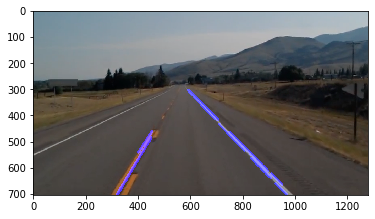

In [108]:
combo_image=cv2.addWeighted(image,0.8,line_image,1,1)
plt.imshow(cv2.cvtColor(combo_image,cv2.COLOR_BGR2RGB))

In [111]:
 #finding co-ordinates from slope and intercept
def make_coordinates(img,line_parameters):
    try:
        slope, intercept = line_parameters
    except TypeError:
        slope, intercept = 0,0
    print("line parameters",line_parameters)
    print("slope and intercept",slope,intercept)
    Y1=img.shape[0]
    Y2=int(Y1*(3/5))
    X1=int((Y1-intercept)/slope)
    X2=int((Y2-intercept)/slope)
    return np.array([X1,Y1,X2,Y2])

In [112]:
#average the lines to make it more smoother
left_fit=[]
right_fit=[]
for line in lines:
    x1,y1,x2,y2=line.reshape(4)
    parameters=np.polyfit((x1,x2),(y1,y2),1)
    slope=parameters[0]
    intercept=parameters[1]
    if slope<0:
        left_fit.append((slope,intercept))
    elif slope>0:
        right_fit.append((slope,intercept))
    else:
        continue

left_fit_avg=np.average(left_fit,axis=0)
right_fit_avg=np.average(right_fit,axis=0)
left_line=make_coordinates(line_image,left_fit_avg)
right_line=make_coordinates(line_image,right_fit_avg)

line parameters [  -1.62451448 1211.57606607]
slope and intercept -1.6245144792314596 1211.5760660722922
line parameters [   1.0127113  -289.87513207]
slope and intercept 1.0127112950748838 -289.8751320735238


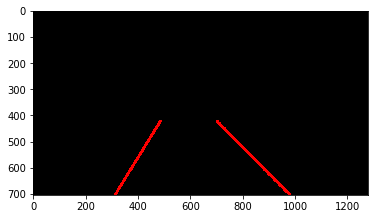

In [113]:
line_image=np.zeros_like(image)
x1,y1,x2,y2=left_line
cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)
x1,y1,x2,y2=right_line
cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)
plt.imshow(cv2.cvtColor(line_image,cv2.COLOR_BGR2RGB))

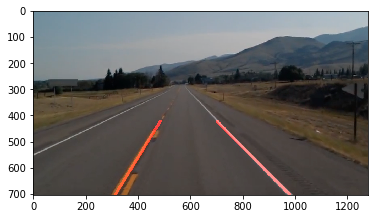

In [114]:
combo_image=cv2.addWeighted(image,0.8,line_image,2,1)
plt.imshow(cv2.cvtColor(combo_image,cv2.COLOR_BGR2RGB))

In [115]:
#finding the lanes for the video

line parameters nan
slope and intercept 0 0


ZeroDivisionError: division by zero

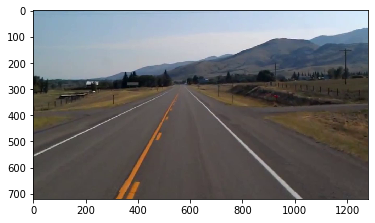

In [116]:
cap=cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
    _,image=cap.read()
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    lanes=np.copy(frame)
    gray=cv2.cvtColor(lanes,cv2.COLOR_RGB2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0);
    canny=cv2.Canny(blur,50,150)
    height=canny.shape[0]
    polygons=np.array([[(200,height),(1100,height),(550,250)]])
    mask=np.zeros_like(canny)
    cv2.fillPoly(mask,polygons,255)
    masked_image=cv2.bitwise_and(canny,mask)
    lines=cv2.HoughLinesP(masked_image,2,np.pi/180,10,minLineLength=40,maxLineGap=5)
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    combo_image=cv2.addWeighted(image,0.8,line_image,1,1)
    left_fit=[]
    right_fit=[]
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        parameters=np.polyfit((x1,x2),(y1,y2),1)
        slope=parameters[0]
        intercept=parameters[1]
        if slope<0:
            left_fit.append((slope,intercept))
        elif slope>0:
            right_fit.append((slope,intercept))
        else:
            continue

    left_fit_avg=np.average(left_fit,axis=0)
    right_fit_avg=np.average(right_fit,axis=0)
    left_line=make_coordinates(line_image,left_fit_avg)
    right_line=make_coordinates(line_image,right_fit_avg)
    line_image=np.zeros_like(image)
    x1,y1,x2,y2=left_line
    cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)
    x1,y1,x2,y2=right_line
    cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)
    combo_image=cv2.addWeighted(image,0.8,line_image,2,1)
    plt.imshow(cv2.cvtColor(combo_image,cv2.COLOR_BGR2RGB))